In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
 import os
from pathlib import Path

In [3]:
import cv2
from fastai import *
from fastai.vision import *

In [4]:
path = Path('/data/Datasets/WhiteBloodCancer/train/')

In [5]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



In [6]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=90, max_lighting=0.15, max_zoom=1.5, max_warp=0.)

In [7]:
np.random.seed(42)

In [9]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c:Union[pathlib.Path, str], check_ext:bool=True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [10]:
fnames = get_image_files(path, recurse=True)
fnames[:5]

[PosixPath('/data/Datasets/WhiteBloodCancer/train/fold_1/hem/UID_H10_43_1_hem.bmp'),
 PosixPath('/data/Datasets/WhiteBloodCancer/train/fold_1/hem/UID_H22_31_15_hem.bmp'),
 PosixPath('/data/Datasets/WhiteBloodCancer/train/fold_1/hem/UID_H14_9_11_hem.bmp'),
 PosixPath('/data/Datasets/WhiteBloodCancer/train/fold_1/hem/UID_H14_28_6_hem.bmp'),
 PosixPath('/data/Datasets/WhiteBloodCancer/train/fold_1/hem/UID_H10_189_1_hem.bmp')]

In [13]:
pat = re.compile(r'^.*(hem|all).bmp$')

In [14]:
size = 224
bs = 64

In [19]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [24]:
data  = (ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=tfms, size=224, bs=bs, valid_pct=0.1)
       ).normalize()

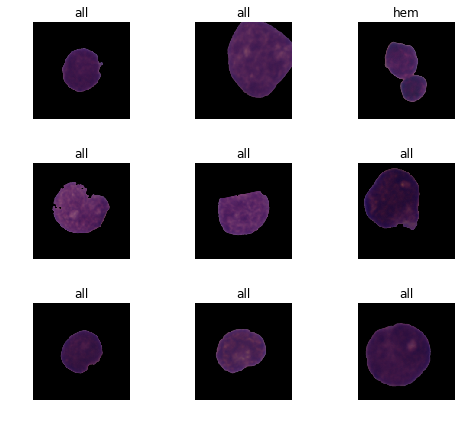

In [25]:
data.show_batch(rows=3, figsize=(12,9))

In [29]:
from sklearn.metrics import roc_auc_score

In [31]:
def auc_score(y_pred,y_true):  
    return roc_auc_score(to_np(y_true),to_np(F.sigmoid(y_pred))[:,1])

In [32]:
f1=Fbeta_binary(beta2=1)

NameError: name 'Fbeta_binary' is not defined

In [41]:
learn = create_cnn(data, models.resnet152, metrics=[error_rate])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/c.marzahl@de.eu.local/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:04<00:00, 57201822.08it/s]


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.463646,0.390782,0.157598


## Results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)